In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Initial Values 
# I = infected population
# R = Recovered Population
# S = Susceptible Population
# assumption - constant population size

I=10**(-6)
R=0
S=1-10**(-6)
y=np.array([S,I,R])

In [3]:
#Setting constants
beta=0.2
gamma=0.1

In [4]:
#we will create a function in Python to estimate the S, I and R with time 
def model(y, t):
    S = y[0]
    I = y[1]
    R = y[2]
    
    lamda = beta*I
    dS = -lamda*S
    dI = lamda*S - gamma*I
    dR = gamma*I
    
    return [dS, dI, dR]

In [5]:
# assuming teq = 1000 days
teq = 1000
# getting an interval of 't'
t = np.arange(0, teq, 1)

# running the odeint module for generating the dataframe
table_data = odeint(model, y, t)
table_dataframe = pd.DataFrame(table_data, columns = ['S', 'I', 'R'])

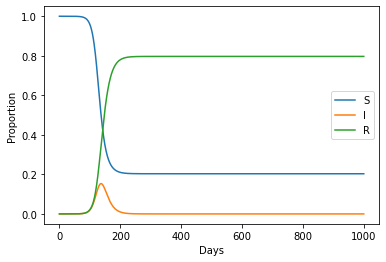

In [6]:
# Plotting the parameters where we show the timesteps as y-axis and count as x-axis
ax = table_dataframe.plot()
ax.set_xlabel("Days")
ax.set_ylabel('Proportion')
plt.show()

In [7]:
Maximum_prevalence=np.max(table_dataframe['I'])
print('Maximum value of Prevalence I is:',Maximum_prevalence)

Maximum value of Prevalence I is: 0.15340862165370073
